## MLP——MultiLayersPercetion多层感知机

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,optimizers,utils,datasets
#from notebook.utils import display

In [2]:
def display(images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:      #images是整数，可能考虑不周
        images = images / 255.0 #如果样本值最大大于1,则归一化到0-1区间
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0 #如果小于0,则归一化到 0-1区间

    plt.figure(figsize=size) #画布Figure的尺寸 宽20英寸 高3英寸
    for i in range(n): #使用for循环绘制n=10个子图
        _ = plt.subplot(1, n, i + 1) #结果抛弃，只要过程。也可以不写 "_ = ";在1行n列的第i+1子图位置绘制
        plt.imshow(images[i].astype(as_type), cmap=cmap) 
        #在前面指定的子图位置，绘制images[i],如果它的数据类型不是as_type=float32,则强制转换成float32
        #cmap一般常用色彩表包括:"gray"、"hot"、"cool"、"spring"等,_r表示reverse，即数值小的颜色浅。数值大的颜色深
        plt.axis("off") #关闭坐标轴显示

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

In [3]:
NUM_CLASS=10

## Prepare dataset

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
y_train=utils.to_categorical(y_train,NUM_CLASS)
y_test=utils.to_categorical(y_test,NUM_CLASS)

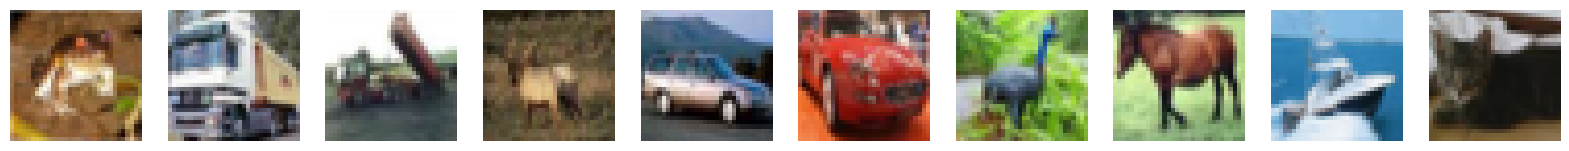

In [6]:
display(x_train[:10])

## build Model

In [7]:
input_layer=layers.Input((32,32,3))
x=layers.Flatten()(input_layer)
x=layers.Dense(200,activation="relu")(x)
x=layers.Dense(150,activation="relu")(x)
output_layer=layers.Dense(NUM_CLASS,activation="softmax")(x)

model=models.Model(input_layer,output_layer)
model.summary()  #模型架构概览

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train model

In [8]:
opt=optimizers.legacy.Adam(learning_rate=0.0005)
model.compile( loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8502 - accuracy: 0.3343
Epoch 2/10
1563/1563 [==============================] - 2s 981us/step - loss: 1.6745 - accuracy: 0.4020
Epoch 3/10
1563/1563 [==============================] - 2s 978us/step - loss: 1.5998 - accuracy: 0.4314
Epoch 4/10
1563/1563 [==============================] - 2s 983us/step - loss: 1.5486 - accuracy: 0.4475
Epoch 5/10
1563/1563 [==============================] - 2s 975us/step - loss: 1.5108 - accuracy: 0.4633
Epoch 6/10
1563/1563 [==============================] - 2s 979us/step - loss: 1.4741 - accuracy: 0.4766
Epoch 7/10
1563/1563 [==============================] - 2s 976us/step - loss: 1.4465 - accuracy: 0.4833
Epoch 8/10
1563/1563 [==============================] - 2s 986us/step - loss: 1.4230 - accuracy: 0.4939
Epoch 9/10
1563/1563 [==============================] - 2s 980us/step - loss: 1.4012 - accuracy: 0.5002
Epoch 10/10
1563/1563 [==============================] - 2s 979us/

In [10]:
model.fit(x_train,y_train,batch_size=32,epochs=20,shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 2s 999us/step - loss: 1.3597 - accuracy: 0.5171
Epoch 2/20
1563/1563 [==============================] - 2s 989us/step - loss: 1.3429 - accuracy: 0.5236
Epoch 3/20
1563/1563 [==============================] - 2s 983us/step - loss: 1.3281 - accuracy: 0.5265
Epoch 4/20
1563/1563 [==============================] - 2s 991us/step - loss: 1.3088 - accuracy: 0.5364
Epoch 5/20
1563/1563 [==============================] - 2s 986us/step - loss: 1.2950 - accuracy: 0.5390
Epoch 6/20
1563/1563 [==============================] - 2s 983us/step - loss: 1.2825 - accuracy: 0.5430
Epoch 7/20
1563/1563 [==============================] - 2s 990us/step - loss: 1.2662 - accuracy: 0.5498
Epoch 8/20
1563/1563 [==============================] - 2s 984us/step - loss: 1.2579 - accuracy: 0.5527
Epoch 9/20
1563/1563 [==============================] - 2s 978us/step - loss: 1.2457 - accuracy: 0.5558
Epoch 10/20
1563/1563 [==============================] - 2s 985u

## Evaluation

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 459us/step - loss: 1.3933 - accuracy: 0.5150


[1.3933082818984985, 0.5149999856948853]

In [22]:
CLASSES=np.array(['airplane','automobile','bird','cat','deer',' dog','frog','horse','ship','truck'])
preds=model.predict(x_test)
pred_single=CLASSES[np.argmax(preds,axis=-1)] #preds是一个test个结果，每个结果one_hot型，argmax  -1 表示沿one_hot轴最大的那个值的序号
actual_single=CLASSES[np.argmax(y_test,axis=-1)]

313/313 [==============================] - 0s 472us/step


In [23]:
y_test.shape

(10000, 10)

In [24]:
num_to_show=10
indics=np.random.choice(range(len(x_test)),num_to_show)

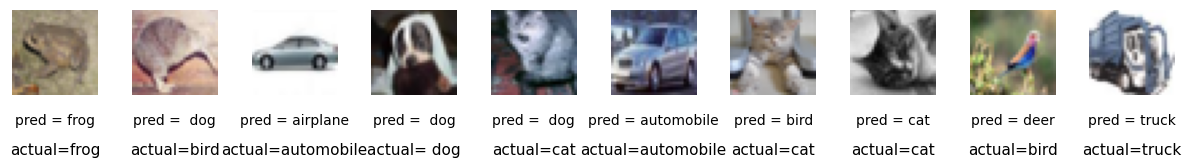

In [30]:
fig=plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4 )
for i,idx in enumerate(indics):
    img=x_test[idx]
    ax=fig.add_subplot(1,num_to_show,i+1)
    ax.axis('off')
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(pred_single[idx]),
        fontsize=10,
        ha='center',
        transform=ax.transAxes,)
    ax.text(
        0.5,
        -0.7,
        'actual='+str(actual_single[idx]),
        fontsize=11,
        ha='center',
        transform=ax.transAxes,)
    ax.imshow(img)
    